In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import os
import numpy as np
import cartopy.crs as ccrs
import json

In [2]:
os.chdir('/home/walml/repos/zoobot')

In [3]:
nsa = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/raw/nsa_v1_0_0.fits')

nsa = nsa[['RA', 'DEC', 'IAUNAME', 'PETROTHETA']].to_pandas()

for col in nsa.columns.values:
    nsa[col.lower()] = nsa[col]
    del nsa[col]

nsa['iauname'] = nsa['iauname'].str.decode('utf8')

In [4]:
nsa

,ra,dec,iauname,petrotheta
0,146.714215,-1.041280,J094651.40-010228.5,7.247893
1,146.628585,-0.765162,J094630.85-004554.5,5.617822
2,146.631706,-0.988347,J094631.59-005917.7,4.769891
3,146.934129,-0.670405,J094744.18-004013.4,6.243227
4,146.963500,-0.544776,J094751.74-003242.0,8.891541
...,...,...,...,...
641404,357.755712,-10.010851,J235101.08-100042.7,17.017670
641405,358.197549,-10.883763,J235247.10-105259.6,17.845497
641406,358.336971,-10.544118,J235320.91-103238.7,5.330101
641407,358.530488,-10.405839,J235406.94-102419.7,27.653702


In [5]:
decals_joint = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/nsa_v1_0_0_decals_dr5.fits').to_pandas()


In [6]:
len(decals_joint)

343128

In [7]:
decals_joint

,iauname,nsa_id,ra,dec,petrotheta,petroth50,petroth90,z,fits_loc,png_loc
0,b'J094651.40-010228.5',0,146.714215,-1.041280,7.247893,3.464192,10.453795,0.021222,b'/Volumes/alpha/decals/fits_native/dr5/J094/J...,b'/Volumes/alpha/decals/png_native/dr5/J094/J0...
1,b'J094630.85-004554.5',1,146.628585,-0.765162,5.617822,2.326989,6.721991,0.064656,b'/Volumes/alpha/decals/fits_native/dr5/J094/J...,b'/Volumes/alpha/decals/png_native/dr5/J094/J0...
2,b'J094631.59-005917.7',2,146.631706,-0.988347,4.769891,2.278736,5.177910,0.052654,b'/Volumes/alpha/decals/fits_native/dr5/J094/J...,b'/Volumes/alpha/decals/png_native/dr5/J094/J0...
3,b'J094744.18-004013.4',3,146.934129,-0.670405,6.243227,2.655191,9.177605,0.121270,b'/Volumes/alpha/decals/fits_native/dr5/J094/J...,b'/Volumes/alpha/decals/png_native/dr5/J094/J0...
4,b'J094751.74-003242.0',4,146.963500,-0.544776,8.891541,4.383704,10.253274,0.055981,b'/Volumes/alpha/decals/fits_native/dr5/J094/J...,b'/Volumes/alpha/decals/png_native/dr5/J094/J0...
...,...,...,...,...,...,...,...,...,...,...
343123,b'J230924.60-001458.1',698646,347.352267,-0.249637,7.473316,3.746857,8.638098,0.116300,b'/Volumes/alpha/decals/fits_native/dr5/J230/J...,b'/Volumes/alpha/decals/png_native/dr5/J230/J2...
343124,b'J235101.08-100042.7',698661,357.755712,-10.010851,17.017670,7.430995,19.937094,0.074300,b'/Volumes/alpha/decals/fits_native/dr5/J235/J...,b'/Volumes/alpha/decals/png_native/dr5/J235/J2...
343125,b'J235247.10-105259.6',698664,358.197549,-10.883763,17.845497,8.614392,18.517103,0.076100,b'/Volumes/alpha/decals/fits_native/dr5/J235/J...,b'/Volumes/alpha/decals/png_native/dr5/J235/J2...
343126,b'J235320.91-103238.7',698665,358.336971,-10.544118,5.330101,2.929065,7.437321,0.077100,b'/Volumes/alpha/decals/fits_native/dr5/J235/J...,b'/Volumes/alpha/decals/png_native/dr5/J235/J2...


In [8]:
decals_joint['iauname'] = decals_joint['iauname'].apply(lambda x: x.decode())

In [9]:
decals_joint['iauname']

0         J094651.40-010228.5
1         J094630.85-004554.5
2         J094631.59-005917.7
3         J094744.18-004013.4
4         J094751.74-003242.0
                 ...         
343123    J230924.60-001458.1
343124    J235101.08-100042.7
343125    J235247.10-105259.6
343126    J235320.91-103238.7
343127    J235414.90-101409.4
Name: iauname, Length: 343128, dtype: object

In [10]:
dr1_dr2 = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/raw/decals_dr1_and_dr2.csv').to_pandas()

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'background' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'bad_image' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'band' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'bands' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableRe

Yes, that's what causes the duplication. I will need to double-check these have reasonable classifications by eye

In [11]:
nsa['iauname']

0         J094651.40-010228.5
1         J094630.85-004554.5
2         J094631.59-005917.7
3         J094744.18-004013.4
4         J094751.74-003242.0
                 ...         
641404    J235101.08-100042.7
641405    J235247.10-105259.6
641406    J235320.91-103238.7
641407    J235406.94-102419.7
641408    J235414.90-101409.4
Name: iauname, Length: 641409, dtype: object

In [12]:
nsa_and_dr12 = pd.merge(nsa, dr1_dr2, on='iauname', how='inner')

In [13]:
len(dr1_dr2), len(nsa_and_dr12)

(103712, 103712)

In [14]:
nsa_and_dr5 = pd.merge(nsa, decals_joint, on='iauname', how='inner')
len(decals_joint), len(nsa_and_dr5)

(343128, 343128)

Let's verify the selection cuts that I think were made, were actually made

In [15]:
valid_cols = []
for col in dr1_dr2.columns.values:
    if np.all(pd.isna(dr1_dr2[col])):
        print(col)
    else:
        valid_cols.append(col)

background
bad_image
band
bands
camera
dr8objid
field
flux_radius1_I
half_rad_h
hubble_id
kron_radius_I
magnitude
mangaid
mass_log_msun
nsa_z
petro_r50_r
petro_r90_r
petrorad_flux
priority
radius_half
sdss_dr12_objid
sdss_dr7_id
sdss_dr8_id
sdss_id
sfr
simulation
snapshot
subdir
subhalo_id


In [16]:
dr1_dr2_valid = dr1_dr2[valid_cols]

In [17]:
dr1 = dr1_dr2_valid.query('data_release == "DR1"')
dr2 = dr1_dr2_valid.query('data_release == "DR2"')
len(dr1), len(dr2), len(dr1) + len(dr2)

(42117, 61595, 103712)

For DR1, no cuts were applied. For DR2, petrotheta > 3 was applied.

In [18]:
dr1.columns.values

array(['col0', '_id', 'absolute_size', 'counters', 'data_release', 'dec',
       'group_id', 'iauname', 'mag', 'nobs_max', 'nsa_id', 'petroflux_r',
       'petrorad_50_r', 'petrorad_r', 'ra', 'redshift', 'retire_at',
       'survey', 'subject_id'], dtype=object)

In [19]:
dr2['petrorad_r'].min()

3.0006349086761475

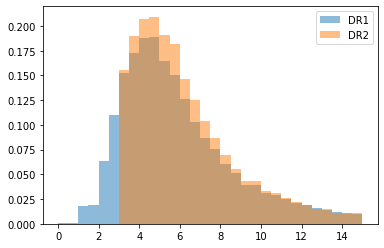

In [20]:
fig, ax = plt.subplots()
_, bins = np.histogram(np.linspace(0., 15.), bins=30)
ax.hist(dr1.query('petrorad_r < 20')['petrorad_r'], bins, alpha=.5, label='DR1', density=True)
ax.hist(dr2.query('petrorad_r < 20')['petrorad_r'], bins, alpha=.5, label='DR2', density=True)
ax.legend()

Coleman said PETROTHETA > 3 - let's check that's the same as 'petrorad_r' here

In [21]:
min_r_index = np.argmin(dr2['petrorad_r'])
min_r_iauname = dr2.iloc[min_r_index]['iauname']
nsa[nsa['iauname'] == min_r_iauname].squeeze()

ra                        148.453
dec                      0.204961
iauname       J095348.63+001217.8
petrotheta                3.00063
Name: 661, dtype: object

Yep, checks out - it was just renamed.


In [22]:
dr1['petrotheta'] = dr1['petrorad_r']
dr2['petrotheta'] = dr2['petrorad_r']
dr1_dr2_valid['petrotheta'] = dr1_dr2_valid['petrorad_r']

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row


Coleman also removed galaxies with suspicious petrotheta, as did I - https://github.com/zooniverse/decals/blob/master/decals/a_download_decals/get_catalogs/selection_cuts.py#L28

In theory then, if we apply those same two cuts retrospectively to DR1, we should have all DR1/DR2 galaxies in the DR5 joint catalog

In [23]:

# https://github.com/zooniverse/decals/blob/master/decals/a_download_decals/get_catalogs/selection_cuts.py#L28
def apply_selection_cuts(input_catalog, snap_tolerance=1e-3):
    """
    Select only galaxies with petrotheta > 3 and not within 1e-3 of bad measurement snap value
    Args:
        catalog (astropy.Table): Galaxy catalog including NSA information
        snap_tolerance (float): Minimum deviation from bad measurement snap value allowed
    Returns:
        (astropy.Table) catalog of galaxies matching selection criteria above
    """

    # Galaxies should be sufficiently extended across the sky
    petrotheta_above_3 = input_catalog['petrotheta'] > 3

    # NSA catalog’s petrotheta calculation sometimes fails to a ‘default’ value
    # Any galaxies with petrotheta within 1e-3 of the snap_to value likely has the wrong size.
    bad_petrotheta_value = 27.653702  # this 'magic' value can be confirmed by looking at petrotheta histograms
    snap_lower_limit = bad_petrotheta_value - snap_tolerance
    snap_upper_limit = bad_petrotheta_value + snap_tolerance

    above_snap_lower_limit = input_catalog['petrotheta'] > snap_lower_limit
    below_snap_upper_limit = input_catalog['petrotheta'] < snap_upper_limit
    within_snap_window = above_snap_lower_limit & below_snap_upper_limit

    selected_catalog = input_catalog[petrotheta_above_3 & ~ within_snap_window]
    return selected_catalog

dr1_cut = apply_selection_cuts(dr1)
print(len(dr1), len(dr1_cut))  # should be lower

dr2_cut = apply_selection_cuts(dr2)
print(len(dr2_cut), len(dr2))  # should not change

42117 37514
61595 61595


In [24]:
decals_joint_cut = apply_selection_cuts(decals_joint)
print(len(decals_joint), len(decals_joint_cut))  # obviously should also have already been applied

343128 343128


In [25]:
# already checked that all DR1/2 galaxies are in NSA. Are they all in DR5?

In [26]:
dr1_dr2_cut = apply_selection_cuts(dr1_dr2_valid)
dr5_and_dr1_dr2 = pd.merge(decals_joint, dr1_dr2_cut, on='iauname', how='inner')

In [27]:
len(dr5_and_dr1_dr2), len(dr1_cut) + len(dr2_cut)  # okay, still dropping 1300 galaxies. Which?

(97790, 99109)

In [28]:
dr5_not_dr1_dr2 = dr1_dr2_cut[~dr1_dr2_cut['iauname'].isin(decals_joint['iauname'])]
len(dr5_not_dr1_dr2)

1319

In [29]:
dr5_not_dr1_dr2['data_release'].value_counts()

DR2    884
DR1    435
Name: data_release, dtype: int64

In [30]:
dr5_not_dr1_dr2['petrotheta']

1941       7.470318
2012       8.978271
2018       4.330838
2021       5.566817
2031       5.566817
            ...    
102980     4.330838
103161     8.085743
103175    10.529021
103194     7.155531
103221     9.624050
Name: petrotheta, Length: 1319, dtype: float64

In [31]:
dr5_not_dr1_dr2['redshift']

1941      0.076049
2012      0.058630
2018      0.055588
2021      0.055906
2031      0.060712
            ...   
102980    0.044473
103161    0.135384
103175    0.125000
103194    0.081100
103221    0.086672
Name: redshift, Length: 1319, dtype: float64

Okay, it's not obvious why those are missing. It's possible some bricks with grz observations were removed on the DECALS side? I think I will press on and potentially remove these 1300 galaxies from the final catalog.

## From Catalog to Images

In [32]:
to_upload = Table.read('/media/walml/beta/galaxy_zoo/decals/catalogs/dr5_nsa1_0_0_to_upload.fits').to_pandas()  # same table, now with png_ready/fits_ready/fits_filled cols added
to_upload['iauname'] = to_upload['iauname'].str.decode('utf8')
len(decals_joint), len(to_upload)

(343128, 343128)

In [33]:
to_upload['fits_ready'].value_counts()

True    343128
Name: fits_ready, dtype: int64

In [34]:
to_upload['png_ready'].value_counts()

True    343128
Name: png_ready, dtype: int64

In [35]:
to_upload['fits_filled'].value_counts()  # >20% of pixels in any band being 0 or nan

True     309398
False     33730
Name: fits_filled, dtype: int64

In [36]:
len(dr1_dr2_cut)

99109

In [37]:
# And how many were already in DR1/2?
np.sum(to_upload.query('fits_filled')['iauname'].isin(dr1_dr2_cut['iauname'])) # which is a little lower than all, because of the 10% or so with bad fits data (we lose about 6% here)

93292

## So 307,484 galaxies could have been uploaded, some of which were in DR1/2. Which actually were?

In [38]:
latest_export = pd.read_csv('/home/walml/Downloads/classifications_200520.csv')
len(latest_export)

239715

In [39]:
np.sum(latest_export['iauname'].duplicated())

32

In [40]:
latest_export.head()

,iauname,smooth-or-featured_artifact,smooth-or-featured_featured-or-disk,smooth-or-featured_smooth,how-rounded_cigar-shaped,how-rounded_in-between,how-rounded_round,disk-edge-on_no,disk-edge-on_yes,edge-on-bulge_boxy,...,bulge-size_obvious-v1_fraction,bulge-size_tiny-v1_fraction,bulge-size_none-v1_fraction,merging_none_fraction,merging_minor-disturbance_fraction,merging_major-disturbance_fraction,merging_merger_fraction,merging_both-v1_fraction,merging_neither-v1_fraction,merging_tidal-debris-v1_fraction
0,J000000.80+004200.0,0.0,2.0,3.0,0.0,1.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.400000,0.000000,0.00,0.60,0.0,0.0,0.0
1,J000001.03+003228.7,0.0,1.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.200000,0.200000,0.00,0.60,0.0,0.0,0.0
2,J000001.55-000533.3,0.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.500000,0.000000,0.25,0.25,0.0,0.0,0.0
3,J000001.85+004309.3,1.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.666667,0.333333,0.00,0.00,0.0,0.0,0.0
4,J000002.29-042805.0,1.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.250000,0.500000,0.00,0.25,0.0,0.0,0.0


In [41]:
latest_export.columns.values

array(['iauname', 'smooth-or-featured_artifact',
       'smooth-or-featured_featured-or-disk', 'smooth-or-featured_smooth',
       'how-rounded_cigar-shaped', 'how-rounded_in-between',
       'how-rounded_round', 'disk-edge-on_no', 'disk-edge-on_yes',
       'edge-on-bulge_boxy', 'edge-on-bulge_none',
       'edge-on-bulge_rounded', 'bar_no', 'bar_weak', 'bar_strong',
       'has-spiral-arms_no', 'has-spiral-arms_yes',
       'spiral-winding_loose', 'spiral-winding_medium',
       'spiral-winding_tight', 'spiral-arm-count_1', 'spiral-arm-count_2',
       'spiral-arm-count_3', 'spiral-arm-count_4',
       'spiral-arm-count_cant-tell', 'spiral-arm-count_more-than-4',
       'bulge-size_none', 'bulge-size_small', 'bulge-size_moderate',
       'bulge-size_large', 'bulge-size_dominant', 'bulge-size_obvious-v1',
       'bulge-size_tiny-v1', 'bulge-size_none-v1', 'merging_none',
       'merging_minor-disturbance', 'merging_major-disturbance',
       'merging_merger', 'merging_both-v1', 'mergi

In [42]:
pd.isna(latest_export['iauname']).value_counts()

False    239682
True         33
Name: iauname, dtype: int64

In [43]:
latest_export = latest_export.dropna(subset=['iauname'])

In [44]:
was_known_galaxy = latest_export['iauname'].isin(nsa['iauname'])
was_known_galaxy.value_counts()

True    239682
Name: iauname, dtype: int64

In [45]:
was_imaged_galaxy = latest_export['iauname'].isin(to_upload['iauname'])
was_imaged_galaxy.value_counts()

True     239631
False        51
Name: iauname, dtype: int64

In [46]:
not_imaged_iaunames = latest_export[~was_imaged_galaxy]['iauname']

In [47]:
latest_subjects = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/latest_subjects_export.csv')

In [48]:
len(latest_subjects)

715548

In [49]:
latest_subjects['workflow_id'].value_counts()

6122.0     230381
10582.0    192614
11308.0     50000
10581.0     19867
6527.0       1601
5653.0        875
12410.0       150
Name: workflow_id, dtype: int64

In [50]:
latest_subjects = latest_subjects[latest_subjects['workflow_id'].isin([6122.0, 10582.0, 10581.0])]  # decals public workflows
len(latest_subjects)

442862

In [51]:
latest_subjects = latest_subjects[~latest_subjects['subject_set_id'].isin([77652])]  # remove eagle subjects
len(latest_subjects)

414660

In [52]:
latest_subjects['metadata'][10000]

'{"!ra":199.83293823928753,"!dec":-1.0749441501917854,"!mag_g":16.980735659599304,"!mag_i":15.506054162979126,"!mag_r":15.984987616539001,"!mag_u":18.876254558563232,"!mag_z":15.15299677848816,"!nsa_id":10755,"!iauname":"J131919.89-010429.7","!redshift":0.08300412446260452,"!mag_abs_r":-21.241125106811523,"!mag_faruv":-999.0,"!petroflux":345.6597900390625,"!petroth50":3.882611036300659,"!mag_nearuv":22.02775824815035,"!petrotheta":9.777639389038086,"!nsa_version":"1_0_0","#upload_date":"2018-03-30","!absolute_size":15.42694563997034,"!decals_search":"[Click to view in DECALS](+tab+http://www.legacysurvey.org/viewer?ra=199.83293823928753\\u0026dec=-1.0749441501917854\\u0026zoom=15\\u0026layer=decals-dr5)","!simbad_search":"[Click to search SIMBAD](+tab+http://simbad.u-strasbg.fr/simbad/sim-coo?Coord=199.83293823928753+%09-1.0749441501917854\\u0026CooFrame=FK5\\u0026CooEpoch=2000\\u0026CooEqui=2000\\u0026CooDefinedFrames=none\\u0026Radius=10.0\\u0026Radius.unit=arcmin\\u0026submit=submit

In [53]:
latest_subjects['metadata'] = latest_subjects['metadata'].apply(json.loads)

In [54]:
def get_iauname(metadata):
    possible_keys = ['iauname', '!iauname', 'IAUNAME', '!IAUNAME']
    for key in possible_keys:
        if key in metadata.keys():
            return metadata[key]
    return np.nan

In [55]:
latest_subjects['iauname'] = latest_subjects['metadata'].apply(get_iauname)

In [56]:
pd.isna(latest_subjects['iauname']).sum()

0

In [57]:
latest_subjects.head()

,subject_id,project_id,workflow_id,subject_set_id,metadata,locations,classifications_count,retired_at,retirement_reason,created_at,updated_at,iauname
2250,20283538,5733,6122.0,19832,"{'!ra': 116.4483378146343, '!dec': 25.86208586...","{""0"":""https://panoptes-uploads.zooniverse.org/...",40,2018-03-20 22:25:30 UTC,classification_count,2018-03-15 18:17:16 UTC,2018-03-15 18:17:16 UTC,J074547.59+255143.5
2252,20283539,5733,6122.0,19832,"{'!ra': 323.31862288433615, '!dec': 11.6900743...","{""0"":""https://panoptes-uploads.zooniverse.org/...",40,2018-03-19 19:51:28 UTC,classification_count,2018-03-15 18:17:16 UTC,2018-03-15 18:17:16 UTC,J213316.46+114124.2
2254,20283540,5733,6122.0,19832,"{'!ra': 321.47404187434915, '!dec': 0.41605876...","{""0"":""https://panoptes-uploads.zooniverse.org/...",40,2018-03-20 15:39:15 UTC,classification_count,2018-03-15 18:17:16 UTC,2018-03-15 18:17:16 UTC,J212553.76+002457.7
2256,20283541,5733,6122.0,19832,"{'!ra': 337.0527522979068, '!dec': 0.543208463...","{""0"":""https://panoptes-uploads.zooniverse.org/...",40,2018-03-20 21:13:41 UTC,classification_count,2018-03-15 18:17:16 UTC,2018-03-15 18:17:16 UTC,J222812.65+003235.5
2258,20283542,5733,6122.0,19832,"{'!ra': 119.21033791857249, '!dec': 28.3758651...","{""0"":""https://panoptes-uploads.zooniverse.org/...",40,2018-03-20 16:02:39 UTC,classification_count,2018-03-15 18:17:16 UTC,2018-03-15 18:17:16 UTC,J075650.47+282233.0


In [58]:
missing_subjects = latest_subjects[latest_subjects['iauname'].isin(not_imaged_iaunames)]
len(missing_subjects), len(not_imaged_iaunames)

(45, 51)

In [59]:
missing_subjects['metadata'].iloc[0]

{'!ra': 13.955534,
 '!dec': -9.96841836,
 '!mag_g': 17.472795248031616,
 '!mag_i': 16.25398874282837,
 '!mag_r': 16.551242470741272,
 '!mag_u': 18.98674875497818,
 '!mag_z': 16.030859351158142,
 '!nsa_id': 108814,
 '!iauname': 'J005549.32-095806.2',
 '!redshift': 0.05509662628173828,
 '!mag_abs_r': -19.694210052490234,
 '!mag_faruv': 23.00110176205635,
 '!petroflux': 207.20045471191406,
 '!petroth50': 1.656927466392517,
 '!mag_nearuv': 22.102905586361885,
 '!petrotheta': 3.710850715637207,
 '!nsa_version': '1_0_0',
 '!sdss_search': '[Click to view in SDSS](+tab+https://skyserver.sdss.org/dr14/en/tools/chart/navi.aspx?ra=13.955534&dec=-9.96841836&scale=0.1&width=120&height=120&opt=)',
 '#upload_date': '2018-04-09',
 '!absolute_size': 4.014254465537618,
 '!decals_search': '[Click to view in DECALS](+tab+http://www.legacysurvey.org/viewer?ra=13.955534&dec=-9.96841836&zoom=15&layer=decals-dr5)',
 '!simbad_search': '[Click to search SIMBAD](+tab+http://simbad.u-strasbg.fr/simbad/sim-coo?Coo

In [60]:
missing_subjects['metadata'].iloc[42]

{'!ra': 194.5528182,
 '!dec': 26.39687848,
 '!mag_g': 13.907611966133118,
 '!mag_i': 12.693479061126709,
 '!mag_r': 13.10900092124939,
 '!mag_u': 15.225940942764282,
 '!mag_z': 12.04756498336792,
 '!nsa_id': 671989,
 '!iauname': 'J125812.39+262349.9',
 '!redshift': 0.019662102684378624,
 '!mag_abs_r': -20.827449798583984,
 '!mag_faruv': 20.269951671361923,
 '!petroflux': 5892.244140625,
 '!petroth50': 18.740535736083984,
 '!mag_nearuv': 19.039023220539093,
 '!petrotheta': 41.58325958251953,
 '!nsa_version': '1_0_0',
 '!sdss_search': '[Click to view in SDSS](+tab+https://skyserver.sdss.org/dr14/en/tools/chart/navi.aspx?ra=194.5528182&dec=26.39687848&scale=0.1&width=120&height=120&opt=)',
 '#upload_date': '2018-04-09',
 '!absolute_size': 16.740997047990632,
 '!decals_search': '[Click to view in DECALS](+tab+http://www.legacysurvey.org/viewer?ra=194.5528182&dec=26.39687848&zoom=15&layer=decals-dr5)',
 '!simbad_search': '[Click to search SIMBAD](+tab+http://simbad.u-strasbg.fr/simbad/sim-c

These seem to be either test uploads by other people, or early uploads by me ahead of finishing the download code. They can (and must) be removed from the published catalog.

In [61]:
latest_export = latest_export[was_imaged_galaxy]
len(latest_export)

239631

### How many did/not pass the selection cuts?

In [62]:
to_upload_cut = apply_selection_cuts(to_upload)
len(to_upload), len(to_upload_cut)

(343128, 343128)

In [63]:
was_valid_upload = latest_export['iauname'].isin(to_upload['iauname'])
was_valid_upload.value_counts()

True    239631
Name: iauname, dtype: int64

Therefore all of them passed the selection cuts. Good times.

### How many had valid images? (I think I forgot this check at first)

In [64]:
was_valid_upload = latest_export['iauname'].isin(to_upload['iauname'])
was_valid_upload.value_counts()

True    239631
Name: iauname, dtype: int64

In [65]:
valid_to_upload = to_upload.query('fits_filled')

In [66]:
was_valid_upload = latest_export['iauname'].isin(valid_to_upload['iauname'])
was_valid_upload.value_counts()

True     227126
False     12505
Name: iauname, dtype: int64

In [67]:
bad_image_iaunames = latest_export[~was_valid_upload]['iauname']
bad_image_subjects = latest_subjects[latest_subjects['iauname'].isin(bad_image_iaunames)]
len(bad_image_subjects), len(bad_image_iaunames)  # will include some duplicates, e.g from mistaken uploads or MANGA

(23305, 12505)

In [68]:
bad_image_subjects['locations'] = bad_image_subjects['locations'].apply(json.loads)

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
bad_image_subjects['locations'].sample(10).values

array([{'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/9557940d-0853-40ec-99d2-f5e25a729e7f.png'},
       {'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/363f50b2-4139-4bb3-b405-fb337f36c469.png'},
       {'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/2b878ec6-ad4f-4ec6-82bd-f1e28897747c.png'},
       {'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/00874737-1322-42a2-a7ce-f1b22c6a11a8.png'},
       {'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/4619dbb1-b8b0-4706-9d28-68618687766a.png'},
       {'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/46e21998-f795-4254-917f-d82dba0feb05.png'},
       {'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/29bdaa14-04a8-4daf-9b88-34754fe0f175.png'},
       {'0': 'https://panoptes-uploads.zooniverse.org/production/subject_location/d3a0e675-d9c2-4349-8236-5abc6c61bf51

Yep, these do seem bad - usually missing a filter - and can be removed. Or, we can probably still include this, but add a 'bad image' flag?

In [70]:
latest_export = latest_export[was_valid_upload]
len(latest_export)

227126

### How many were in DR1/2?

In [71]:
was_in_dr1_dr2 = latest_export['iauname'].isin(dr1_dr2['iauname'])  # not including the possible post-hoc DR1 cut
was_in_dr1_dr2.sum(), len(dr1_dr2), len(latest_export)

(34738, 103712, 227126)

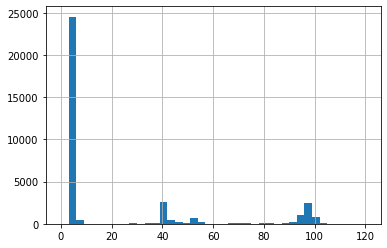

In [72]:
_, bins = np.histogram(np.linspace(0., 120.), bins=40)
votes = latest_export[was_in_dr1_dr2]['smooth-or-featured_total-votes']
votes.hist(bins=bins)

In [73]:
(votes.values < 7).sum(), ((35 < votes.values) & (votes.values < 45)).sum(), (votes.values > 80).sum()

(24800, 3170, 4858)

In [74]:
votes[votes < 7].value_counts()

5.0    9029
4.0    8634
3.0    6890
6.0     247
Name: smooth-or-featured_total-votes, dtype: int64

I think that the only reasons for joint catalog galaxies not to be uploaded are:
- Already classified in DR1/2
- Bad fits image

Let's verify by cutting down to_upload and seeing if all the remaining galaxies are in latest_export.

In [75]:
len(to_upload)

343128

In [76]:
len(to_upload.query('fits_filled'))

309398

In [77]:
# not_in_dr1_dr2 = to_upload[~to_upload['iauname'].isin(dr1_dr2['iauname'])]
# len(not_in_dr1_dr2) NO not all subjects were classified

In [103]:
#dr1/2 raw classifications
dr1_c = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/gzreduction_ouroborous/working_dir/raw/classifications/2017-10-15_galaxy_zoo_decals_classifications.csv')
dr2_c = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/gzreduction_ouroborous/working_dir/raw/classifications/2017-10-15_galaxy_zoo_decals_dr2_classifications.csv')

dr1_subject_ids = set(dr1_c['subject_id'])
dr2_subject_ids = set(dr2_c['subject_id'])
dr1_2_subject_ids = dr1_subject_ids.union(dr2_subject_ids)
dr1_dr2_subjects = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/catalogs/raw/decals_dr1_and_dr2.csv')
dr1_dr2_classified = dr1_dr2_subjects[dr1_dr2_subjects['subject_id'].isin(dr1_2_subject_ids)]
print(len(dr1_dr2_subjects), len(dr1_dr2_classified))

dr1_dr2_classified_iaunames = dr1_dr2_classified['iauname']
not_classified_in_dr1_dr2 = to_upload[~to_upload['iauname'].isin(dr1_dr2_classified_iaunames)]
print(len(not_classified_in_dr1_dr2))

103712 94024
253908


In [104]:
should_be_uploaded = not_classified_in_dr1_dr2.query('fits_filled')
len(should_be_uploaded)

220801

In [105]:
should_be_uploaded['iauname'].isin(latest_export['iauname']).value_counts()

True     194374
False     26427
Name: iauname, dtype: int64

Okay, so there's another 10% we could have uploaded? The random uploads are done from '/media/walml/beta/decals/catalogs/decals_master_catalog.csv'

In [106]:
master_catalog = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/catalogs/decals_master_catalog.csv')

In [107]:
to_upload['iauname'].isin(master_catalog['iauname']).value_counts()

True     334027
False      9101
Name: iauname, dtype: int64

In [108]:
allegedly_uploadable = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/catalogs/decals_dr5_uploadable_master_catalog_nov_2019.csv')

ml_labels = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/results/classifications_2019_10_03.csv')

In [109]:
len(to_upload), len(allegedly_uploadable), len(should_be_uploaded)  # should be filtered by not in DR1/2, not already classified, filled_fits, and (from to_upload) selection cuts

(343128, 214280, 220801)

Excellent. Just to refresh things and recover that weird missing 8 galaxies, I'll update the uploadable catalog and then use gz-scripts to upload all those galaxies to decals/wrapping_up_dr5 subject set

These weren't included before because I got confused and used/gave the 'decals_master_catalog file' instead of 'decals_dr5_uploadable_master_catalog_nov_2019'. Clear names and clean folders are important for doing the right thing!

In [110]:
master_catalog['iauname'].isin(to_upload['iauname']).value_counts()

True    334027
Name: iauname, dtype: int64

In [111]:
master_catalog['iauname'].isin(to_upload.query('fits_filled')['iauname']).value_counts()

True     300535
False     33492
Name: iauname, dtype: int64

In [112]:
master_catalog['iauname'].isin(not_classified_in_dr1_dr2['iauname']).value_counts()

True     249369
False     84658
Name: iauname, dtype: int64

So uploading from the master catalog is a really bad idea and Tobias and I have probably been doing it. Woops!!

This is the catalog I gave tobias to use:

In [113]:
tobias = pd.read_csv('/home/walml/Downloads/decals_master_catalog_tobias.csv')

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
len(tobias)

209215

In [115]:
tobias['iauname'].isin(should_be_uploaded['iauname']).value_counts()

True     208775
False       440
Name: iauname, dtype: int64

In [116]:
should_be_uploaded['iauname'].isin(tobias['iauname']).value_counts()

True     208775
False     12026
Name: iauname, dtype: int64

Hmm. Actually, this *was* the right file and includes all but 5000 of the galaxies which should have been uploaded.

Let's use the latest subject export to find all the iaunames not yet uploaded that should have been, and upload them.

In [117]:
should_be_uploaded['iauname'].isin(latest_subjects['iauname']).value_counts()

True     187445
False     33356
Name: iauname, dtype: int64

In [118]:
missing = should_be_uploaded[~should_be_uploaded['iauname'].isin(latest_subjects['iauname'])]
len(missing)

33356

In [119]:
missing['iauname'].sample(10)

58014     J021734.13-080843.2
114086    J021253.37+005345.3
322102    J104723.89-033108.9
232618    J084604.56+135923.5
271134    J140345.38+154618.4
217866    J083149.45+170217.5
59192     J002004.89-011459.5
317029    J022533.49-082514.9
314663    J231921.89+163401.0
60508     J030051.56+004826.5
Name: iauname, dtype: object

These can be safely uploaded as a new subject set

In [120]:
missing['png_loc'] = missing['png_loc'].apply(lambda x: x.decode('utf8'))
missing['fits_loc'] = missing['fits_loc'].apply(lambda x: x.decode('utf8'))

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
missing

,iauname,nsa_id,ra,dec,petrotheta,petroth50,petroth90,z,fits_loc,png_loc,fits_ready,fits_filled,png_ready
14208,J152824.24-002951.3,16333,232.101003,-0.497560,11.394722,5.300970,12.203951,0.057843,/Volumes/EXTERNAL/decals/fits/dr5/J152/J152824...,/Volumes/EXTERNAL/decals/png/dr5/J152/J152824....,True,True,True
16290,J120208.92-030136.9,18671,180.537134,-3.026832,31.546129,17.297550,46.023430,0.052493,/Volumes/EXTERNAL/decals/fits/dr5/J120/J120208...,/Volumes/EXTERNAL/decals/png/dr5/J120/J120208....,True,True,True
20516,J153221.48+003021.5,26956,233.089534,0.505969,8.704482,3.753158,12.340964,0.086825,/Volumes/EXTERNAL/decals/fits/dr5/J153/J153221...,/Volumes/EXTERNAL/decals/png/dr5/J153/J153221....,True,True,True
20669,J162220.24-003525.5,27167,245.584363,-0.590422,7.437321,3.518912,7.995928,0.044573,/Volumes/EXTERNAL/decals/fits/dr5/J162/J162220...,/Volumes/EXTERNAL/decals/png/dr5/J162/J162220....,True,True,True
20752,J163058.78+001620.0,27270,247.744970,0.272281,9.324070,4.247065,9.624050,0.113730,/Volumes/EXTERNAL/decals/fits/dr5/J163/J163058...,/Volumes/EXTERNAL/decals/png/dr5/J163/J163058....,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343095,J144321.99-003753.1,698496,220.841699,-0.631355,4.146680,1.851529,5.675371,0.149900,/Volumes/EXTERNAL/decals/fits/dr5/J144/J144321...,/Volumes/EXTERNAL/decals/png/dr5/J144/J144321....,True,True,True
343101,J143913.73-002317.4,698509,219.807135,-0.388077,5.814044,2.711314,5.702838,0.138800,/Volumes/EXTERNAL/decals/fits/dr5/J143/J143913...,/Volumes/EXTERNAL/decals/png/dr5/J143/J143913....,True,True,True
343107,J143619.83-010748.1,698522,219.083613,-1.130237,18.740425,7.763114,25.235826,0.105971,/Volumes/EXTERNAL/decals/fits/dr5/J143/J143619...,/Volumes/EXTERNAL/decals/png/dr5/J143/J143619....,True,True,True
343116,J144612.39-014833.1,698548,221.550819,-1.814557,4.897500,2.093886,7.086283,0.080386,/Volumes/EXTERNAL/decals/fits/dr5/J144/J144612...,/Volumes/EXTERNAL/decals/png/dr5/J144/J144612....,True,True,True


In [122]:
missing['relative_png_loc'] = missing['png_loc'].apply(lambda x: x.replace('/Volumes/EXTERNAL/decals/png/dr5/', ''))

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
missing['relative_png_loc']

14208     J152/J152824.24-002951.3.png
16290     J120/J120208.92-030136.9.png
20516     J153/J153221.48+003021.5.png
20669     J162/J162220.24-003525.5.png
20752     J163/J163058.78+001620.0.png
                      ...             
343095    J144/J144321.99-003753.1.png
343101    J143/J143913.73-002317.4.png
343107    J143/J143619.83-010748.1.png
343116    J144/J144612.39-014833.1.png
343124    J235/J235101.08-100042.7.png
Name: relative_png_loc, Length: 33356, dtype: object

In [124]:
missing['redshift'] = missing['z']
del missing['z']

missing['nsa_version'] = '1_0_0'

/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/walml/anaconda3/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [126]:
missing.to_csv('dr5_missing_galaxies.csv', index=False)

In [ ]:
dr1_raw = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/gzreduction_ouroborous/working_dir/raw/classifications/2017-10-15_galaxy_zoo_decals_classifications.csv').drop_duplicates()
dr2_raw = pd.read_csv('/media/walml/beta/galaxy_zoo/decals/gzreduction_ouroborous/working_dir/raw/classifications/2017-10-15_galaxy_zoo_decals_dr2_classifications.csv').drop_duplicates()

In [ ]:
dr1_raw.groupby('subject_id').agg({'id': 'count'}).reset_index()['id'].hist(bins=40)

In [ ]:
dr2_raw.groupby('subject_id').agg({'id': 'count'}).reset_index()['id'].hist(bins=40)